In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [3]:
df = pd.read_table('Data_28_F29.txt', delimiter=',')

In [4]:
df.columns.values

array(['FID', 'ID', 'FIELD', 'OID_1', 'YLD00', 'YLD01', 'YLD02', 'YLD03',
       'AVGYLD', 'ELE', 'SLOPE', 'CURV', 'PRO', 'PLAN', 'EC_SH', 'EC_DP',
       'BAND1', 'BAND2', 'BAND3', 'BAND4', 'VI00_520', 'VI00_528',
       'VI00_613', 'VI00_707', 'VI00_715', 'VI00_723', 'VI00_816',
       'VI00_824', 'VI00_901', 'VI00_917', 'VI01_616', 'VI01_624',
       'VI01_710', 'VI01_827', 'VI01_912', 'VI02_518', 'VI02_526',
       'VI02_619', 'VI02_713', 'VI02_721', 'VI02_830', 'VI02_907',
       'VI02_923', 'VI03_505', 'VI03_529', 'VI03_606', 'VI03_622',
       'VI03_724', 'VI03_825', 'VI03_926', 'STD00', 'STD01', 'STD02',
       'STD03', 'CV', 'M3_00', 'M3_01', 'M3_02', 'M3_03', 'M3_AV', 'CL_AV',
       'CL_00', 'CL_01', 'CL_02', 'CL_03'], dtype=object)

In [5]:
columns = ['FID', 'ID','FIELD','YLD00','YLD01','YLD02','YLD03','AVGYLD','ELE','SLOPE','CURV',
           'PRO','PLAN','EC_SH','EC_DP','BAND1','BAND2','BAND3','BAND4','VI00_520','VI00_528',
           'VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917',
           'VI01_616','VI01_624','VI01_710','VI01_827','VI01_912','VI02_518','VI02_526','VI02_619',
           'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923','VI03_505','VI03_529','VI03_606',
           'VI03_622','VI03_724','VI03_825','VI03_926']
ndvi_cols = ['VI00_520','VI00_528',
           'VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917',
           'VI01_616','VI01_624','VI01_710','VI01_827','VI01_912','VI02_518','VI02_526','VI02_619',
           'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923','VI03_505','VI03_529','VI03_606',
           'VI03_622','VI03_724','VI03_825','VI03_926']
band_cols = ['BAND1','BAND2','BAND3','BAND4']
yld_cols = ['YLD00','YLD01','YLD02','YLD03','AVGYLD']

In [6]:
df_use = df[columns]
df_use.head()

,FID,ID,FIELD,YLD00,YLD01,YLD02,YLD03,AVGYLD,ELE,SLOPE,...,VI02_830,VI02_907,VI02_923,VI03_505,VI03_529,VI03_606,VI03_622,VI03_724,VI03_825,VI03_926
0,0,3018,C29,1012.799988,1201.900024,943.599976,1082,1060.099976,1080.06,0.0879,...,0.359116,0.273810,0.026178,-0.042553,-0.215094,-0.157303,-0.136364,-0.021505,0.128571,0.085366
1,1,3019,C29,930.000000,1352.000000,1033.099976,1202,1129.199951,1080.08,0.0575,...,0.439560,0.345238,0.096774,-0.053763,-0.220974,-0.169399,-0.163842,-0.010870,0.144828,0.144578
2,2,3020,C29,902.000000,1389.400024,1073.699951,1196,1140.300049,1080.10,0.0906,...,0.445652,0.345238,0.124324,-0.057592,-0.219331,-0.170213,-0.184358,-0.016043,0.140940,0.111111
3,3,3021,C29,931.900024,1348.099976,1042.400024,1120,1110.599976,1080.13,0.1291,...,0.425532,0.345238,0.104167,-0.071429,-0.236364,-0.165775,-0.169399,0.005405,0.120000,0.135135
4,4,3022,C29,885.000000,1301.199951,978.400024,1119,1070.800049,1080.18,0.1515,...,0.387097,0.321637,0.094737,-0.066667,-0.226277,-0.183246,-0.169399,-0.005291,0.099338,0.069767


In [7]:
FY00_cols = ['FID', 'ID','FIELD', 'ELE','SLOPE','CURV','PRO','PLAN','EC_SH','EC_DP',
             'BAND1','BAND2','BAND3','BAND4','VI00_520','VI00_528','VI00_613','VI00_707',
             'VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917','YLD00']
FY01_cols = ['FID', 'ID','FIELD', 'ELE','SLOPE','CURV','PRO','PLAN','EC_SH','EC_DP',
             'BAND1','BAND2','BAND3','BAND4','VI01_616','VI01_624','VI01_710','VI01_827',
             'VI01_912','YLD01']
FY02_cols = ['FID', 'ID','FIELD', 'ELE','SLOPE','CURV','PRO','PLAN','EC_SH','EC_DP',
             'BAND1','BAND2','BAND3','BAND4','VI02_518','VI02_526','VI02_619',
             'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923', 'YLD02']
FY03_cols = ['FID', 'ID','FIELD', 'ELE','SLOPE','CURV','PRO','PLAN','EC_SH','EC_DP',
             'BAND1','BAND2','BAND3','BAND4','VI03_505','VI03_529','VI03_606',
             'VI03_622','VI03_724','VI03_825','VI03_926','YLD03']

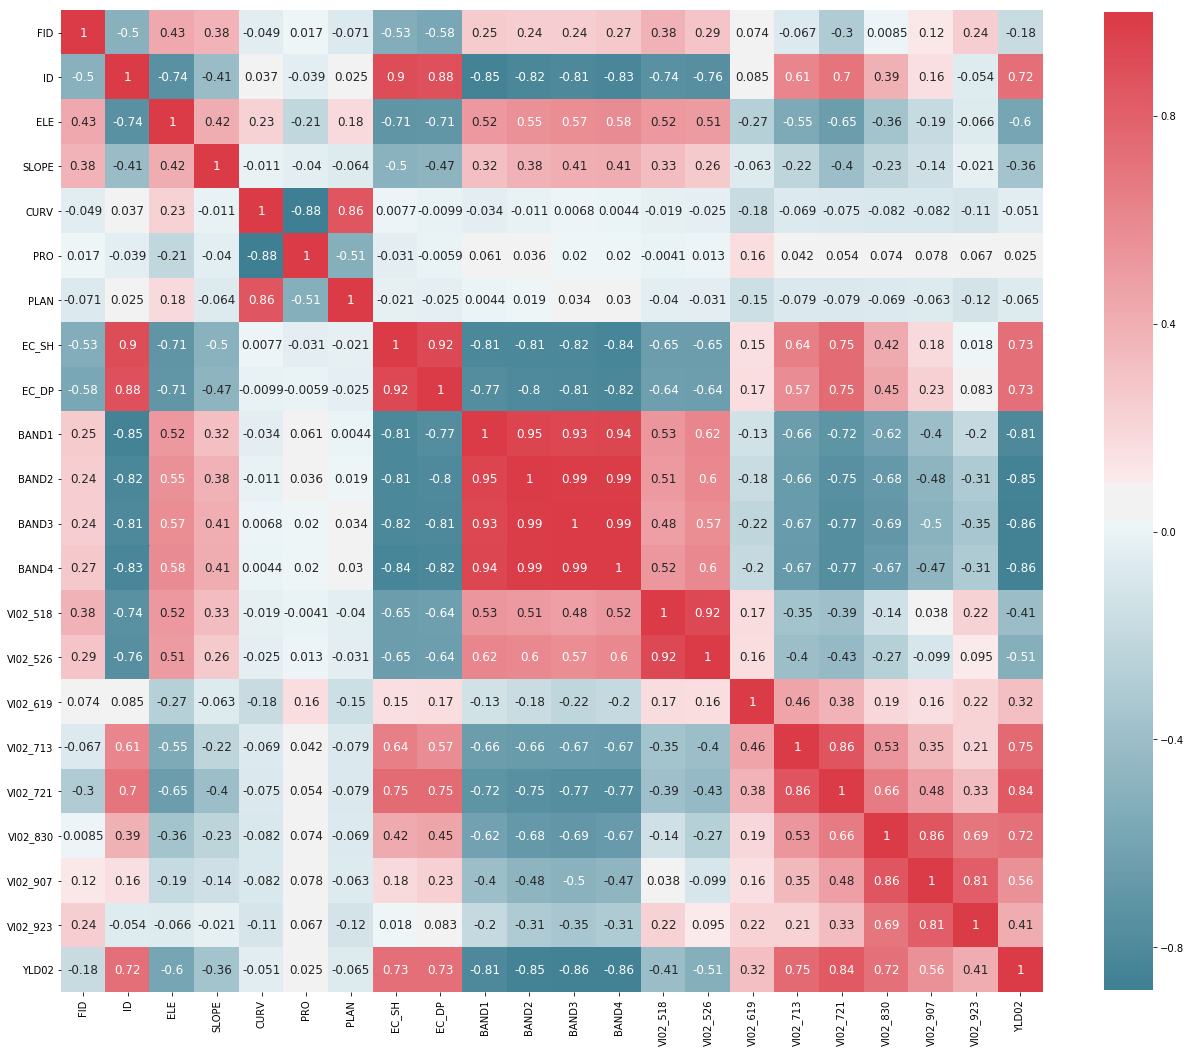

In [11]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize=(22, 20))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(
        corr, 
        cmap=cmap,
        square=True, 
        cbar_kws={'shrink': .9}, 
        ax=ax, 
        annot=True, 
        annot_kws={'fontsize': 12}
    )
plot_correlation_map(df[FY02_cols])